In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

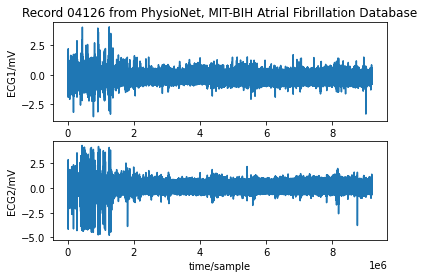

{'record_name': '04126',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 9205760,
 'base_time': datetime.time(11, 0),
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': array([[-0.04 , -0.235],
        [-0.055, -0.21 ],
        [-0.06 , -0.21 ],
        ...,
        [-0.05 , -0.14 ],
        [-0.05 , -0.11 ],
        [-0.035, -0.125]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['04126.dat', '04126.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-8, -47],
 'checksum': [-20405, 8226],
 'block_size': [0, 0]}

In [12]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord('D:/1_OVERFØRSLER_D/files/04126') 
wfdb.plot_wfdb(record=record, title='Record 04126 from PhysioNet, MIT-BIH Atrial Fibrillation Database') 
display(record.__dict__)

# Can also read the same files hosted on PhysioNet https://physionet.org/content/challenge-2015/1.0.0
# in the /training/ database subdirectory.
#record2 = wfdb.rdrecord('a103l', pn_dir='challenge-2015/training/')

In [15]:
# Demo 2 - Read certain channels and sections of the WFDB record using the simplified 'rdsamp' function
# which returns a numpy array and a dictionary. Show the data.
# Example as -> signals, fields = wfdb.rdsamp('sample-data/s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000)
signals, fields = wfdb.rdsamp('D:/1_OVERFØRSLER_D/files/04126', sampfrom=100, sampto=10100)
display(signals)
display(fields)

# Can also read the same files hosted on Physionet
#signals2, fields2 = wfdb.rdsamp('s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000, pn_dir='ptbdb/patient001/')

array([[ 0.01 ,  0.43 ],
       [ 0.055,  0.66 ],
       [ 0.1  ,  0.795],
       ...,
       [-0.08 , -0.275],
       [-0.08 , -0.26 ],
       [-0.06 , -0.265]])

{'fs': 250,
 'sig_len': 10000,
 'n_sig': 2,
 'base_date': None,
 'base_time': datetime.time(11, 0, 0, 400000),
 'units': ['mV', 'mV'],
 'sig_name': ['ECG1', 'ECG2'],
 'comments': []}

In [16]:
# Demo 3 - Read a WFDB header file only (without the signals)
record = wfdb.rdheader('D:/1_OVERFØRSLER_D/files/04126')
display(record.__dict__)

# Can also read the same file hosted on Physionet
#record2 = wfdb.rdheader('drive02', pn_dir='drivedb')

{'record_name': '04126',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 9205760,
 'base_time': datetime.time(11, 0),
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': None,
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['04126.dat', '04126.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-8, -47],
 'checksum': [-20405, 8226],
 'block_size': [0, 0]}

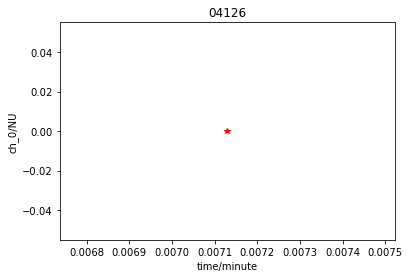

In [17]:
# Demo 4 - Read part of a WFDB annotation file into a wfdb.Annotation object, and plot the samples
annotation = wfdb.rdann('D:/1_OVERFØRSLER_D/files/04126', 'atr', sampfrom=100, sampto=10100)
annotation.fs = 360
wfdb.plot_wfdb(annotation=annotation, time_units='minutes')

# Can also read the same file hosted on PhysioNet 
#annotation2 = wfdb.rdann('100', 'atr', sampfrom=100000, sampto=110000, pn_dir='mitdb')

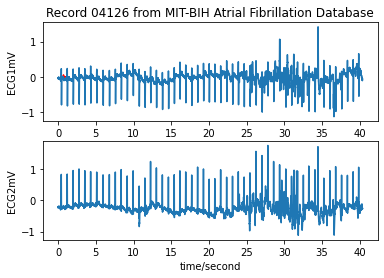

In [18]:
# Demo 5 - Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
record = wfdb.rdrecord('D:/1_OVERFØRSLER_D/files/04126', sampto = 10100)
annotation = wfdb.rdann('D:/1_OVERFØRSLER_D/files/04126', 'atr', sampto = 10100)

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Record 04126 from MIT-BIH Atrial Fibrillation Database',
               time_units='seconds')